<a href="https://colab.research.google.com/github/jljudge-gh/JupyterNotebooks-MathmaticalMethods-DataScience/blob/main/1_4_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1.4 Principal Component Analysis**

## **1.4.1 Singular Value Decomposition**

###Theorem 1.4.1 
If an $m\times n$ matrix $A$ has $r$ nonzero singular values, $\sigma_1,\dots,\sigma_r \geq 0$ with $\sigma_{r+1}=\dots=\sigma_n=0$, then the dimension of $\text{col}(A) = r$.

### Theorem 1.4.2 (The Singular Value Decomposition) <br>
Let A be an $m\times n$ matrix with the dimension of $\text{col}(A) = r$. Then there exists an $m\times n$ matrix $\Sigma$, where
the diagonal entries in $D$ are the first $r$ singular values of $A$ $\sigma_1 \geq \sigma_2 \geq \cdots\geq \sigma_r\geq 0$, and there exist an $m\times m$ orthogonal matrix $U$ and an $n\times n$ orthogonal
matrix $V$ such that 
$$A = U \sum V^T.$$
Any factorization $A = U \sum V^T$, with $U$ and $V$ orthogonal and $\sigma$, is called a singular value decomposition SVD of $A$. The matrices $U$ and $V$ are not unique, but the diagonal entries of $\sum$ are necessarily the singular values of $A$. The column of $U$ in such a decomposition are called left singular vectors of $A$, and the column of $V$ are called right singular vectors of $A$. This type of matrix factorization is illustrated in Fig. 1.4.

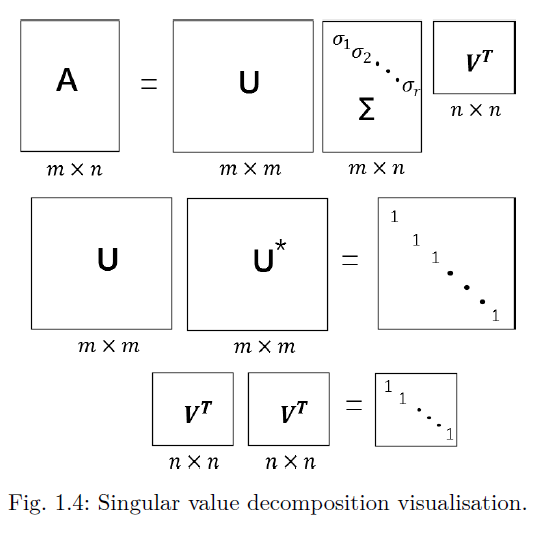

#### Applying Singular Value Decomposition in Python

In [1]:
# In the following code we’ll attempt to classify handwritten digits.
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

In [3]:
# The dataset contains 1797 8x8 images. Specifying return_X_y=True will return the pixels as a one dimensional array.
X, y = load_digits(return_X_y=True)
# x contains the pixels as a one dimensional array
print(X.shape)
# y contains the labels for every digit
print(y)

(1797, 64)
[0 1 2 ... 8 9 8]


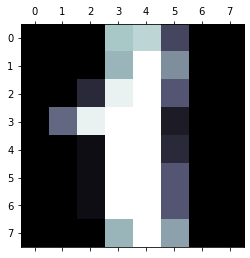

In [17]:
image = X[1]
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'bone')

In [18]:
# Now we use Singular Value Decomposition to see if we can reconstruct the image using only 2 features for each row
U, s, V = np.linalg.svd(image)
# The s matrix returned by the function must be converted into a diagonal matrix using the diag method
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
Sigma = S[:, :n_component]
VT = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)

[[0.00 0.00 -0.00 12.00 13.00 5.00 0.00 0.00]
 [0.00 0.00 -0.00 11.00 16.00 9.00 0.00 0.00]
 [0.00 0.00 3.00 15.00 16.00 6.00 0.00 0.00]
 [0.00 7.00 15.00 16.00 16.00 2.00 0.00 0.00]
 [0.00 0.00 1.00 16.00 16.00 3.00 0.00 0.00]
 [0.00 0.00 1.00 16.00 16.00 6.00 0.00 0.00]
 [0.00 0.00 1.00 16.00 16.00 6.00 0.00 0.00]
 [0.00 0.00 -0.00 11.00 16.00 10.00 0.00 0.00]]


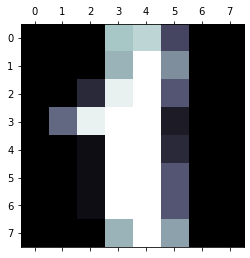

In [19]:
plt.matshow(A, cmap = 'bone')

## **1.4.2 Low-Rank Matrix Approximations**

### Definition 1.4.3 (Induced Norm) <br>
The 2-norm of a matrix $A \in \mathbb{R}^{n \times m}$ is
$$
\|A\|_{2}=\max _{0 \neq \mathbf{x} \in \mathbb{R}^{m}} \frac{\|A \mathbf{x}\|}{\|\mathbf{x}\|}=\max _{\mathbf{x} \neq 0, \mid \mathbf{x} \|=1}\|A \mathbf{x}\|=\max _{\mathbf{x} \neq 0,\|\mathbf{x}\|=1} \mathbf{x}^{T} A^{T} A \mathbf{x}
$$
Let $A \in \mathbb{R}^{n \times m}$ be a matrix with SVD
$$
A=\sum_{j=1}^{r} \sigma_{j} \mathbf{u}_{j} \mathbf{v}_{j}^{T}
$$
For $k<r$, truncate the sum at the $k$-th term
$$
A_{k}=\sum_{j=1}^{k} \sigma_{j} \mathbf{u}_{j} \mathbf{v}_{j}^{T}
$$
The rank of $A_{k}$ is exactly $k$. Indeed, by construction,
1. the vectors $\left\{\mathbf{u}_{j}: j=1, \ldots, k\right\}$ are orthonormal, and
2. since $\sigma_{j}>0$ for $j=1, \ldots, k$ and the vectors $\left\{\mathbf{v}_{j}: j=1, \ldots, k\right\}$ are orthonormal,$\left\{\mathbf{u}_{j}:\right.$ $j=1, \ldots, k\}$ spans the column space of $A_{k}$.

### Lemma 1.4.4 (Matrix Norms and Singular Values) <br>
Let $A \in \mathbb{R}^{n \times m}$ be a matrix with SVD
$$
A=\sum_{j=1}^{r} \sigma_{j} \mathbf{u}_{j} \mathbf{v}_{j}^{T}
$$
where recall that $\sigma_{1} \geq \sigma_{2} \geq \cdots \sigma_{r}>0$ and let $A_{k}$ be the truncation defined above. Then
$$
\left\|A-A_{k}\right\|_{2}^{2}=\sigma_{k+1}^{2}
$$

### Theorem 1.4.5 (Eckart-Young-Mirsky theorem) (Low-Rank Approximation in the Induced Norm) <br>
Let $A \in \mathbb{R}^{n\times m}$ be a matrix with SVD
$$A =\sum_{j=1}^r\sigma_j\textbf{u}_j\textbf{v}_j^T.$$
and let $A_k$ be the truncation defined above with $k < r$. For any matrix $B \in\mathbb{R}^{n\times m}$
of rank at most $k$,
$$||A−A_k||_2 \leq ||A−B||_2.$$ 

## **1.4.3 Principal Component Analysis**

### 1.4.3.1 Covariance Matrix <br>

To prepare for principal component analysis, let $\left[\mathbf{X}_{1} \cdots \mathbf{X}_{N}\right]$ be a $p \times N$ matrix of observation, such as describe above. The sample mean $M$ of the observation vectors $\mathbf{X}_{1}, \ldots, \mathbf{X}_{n}$ is given by
$$
\mathbf{M}=\frac{1}{N}\left(\mathbf{X}_{1}+\cdots+\mathbf{X}_{N}\right)
$$

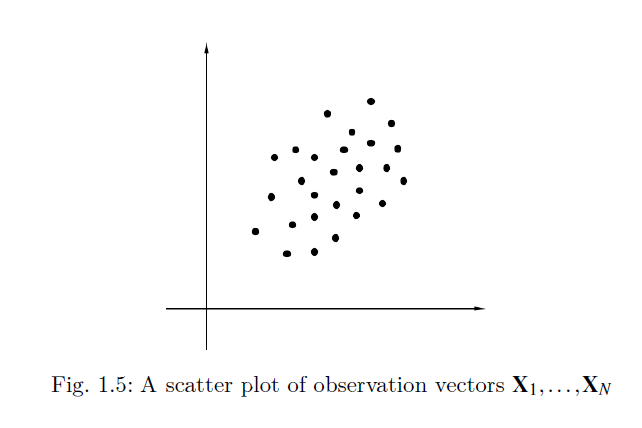

For the data in Figure 1.5, the sample mean is the point in the "center" of the scatter plot. For $k=1, \ldots, N$, let
$$
\hat{\mathbf{X}}_{k}=\mathbf{X}_{k}-\mathbf{M}
$$
The columns of the $p \times N$ matrix
$$
B=\left[\hat{\mathbf{X}}_{1}, \hat{\mathbf{X}}_{2}, \cdots \hat{\mathbf{X}}_{N}\right]
$$
have a zero sample mean, and B is said to be in mean-deviation form. When
the sample mean is subtracted from the data in 1.5, the resulting scatter plot
has the form in Figure 1.6.

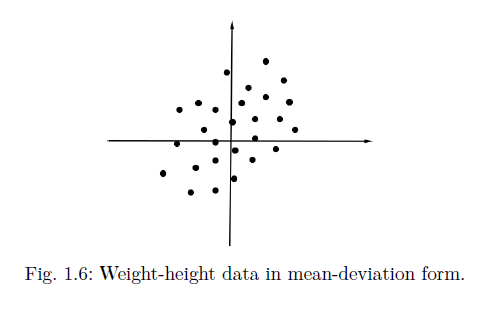

The (sample) covariance matrix is the $p \times p$ matrix $\mathrm{S}$ defined by
$$
S=\frac{1}{N-1} B B^{T}
$$
Since any matrix of the form $B B^{T}$ is positive semidefinite, so is $S$.

### 1.4.3.2 Principal Component Analysis <br>

Now assume that the columns of the $p \times N$ data matrix
$$
X=\left[\mathbf{X}_{1}, \mathbf{X}_{2}, \cdots \mathbf{X}_{N}\right]
$$
is already in mean-deviation from. The goal of principal component analysis (PCA) is to find $k,(k \leq p)$ orthonormal vectors $\mathbf{v}_{1}, \ldots, \mathbf{v}_{\mathbf{k}}$, (top $k$ principal components) that maximize the objective function
$$
\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{k}\left\langle\mathbf{X}_{i} \cdot \mathbf{v}_{\mathbf{j}}\right\rangle^{2}
$$
$\left\langle\mathbf{X}_{\mathbf{i}} \cdot \mathbf{v}_{\mathbf{j}}\right\rangle$ is the length of projection of $\mathbf{X}_{i}$ on $\mathbf{v}_{\mathbf{j}}$
On the other hand, for each $j$, it is easy to see that
$$
\mathbf{v}_{\mathbf{j}}^{T} X X^{T} \mathbf{v}_{\mathbf{j}}=\left(X^{T} \mathbf{v}_{\mathbf{j}}\right)^{T}\left(X^{T} \mathbf{v}_{\mathbf{j}}\right)=\sum_{i=1}^{N}\left\langle\mathbf{X}_{\mathbf{i}} \cdot \mathbf{v}_{\mathbf{j}}\right\rangle^{2}
$$

where $X X^{T}$ is a $p \times p$ matrix. As a result, for each $j \leq k$, the variancemaximization problem can be rephrased as
$$
\operatorname{argmax}_{\mathbf{v}:\|\mathbf{v}\|=1} \mathbf{v}_{\mathbf{j}}^{T} X X^{T} \mathbf{v}_{\mathbf{j}}
$$
Assume that
$$
X X^{T}=V \operatorname{diag}\left(\lambda_{1}, \ldots, \lambda_{p}\right) V^{T}, \text { or } V^{T} X X^{T} V=\left(\lambda_{1}, \ldots, \lambda_{p}\right)
$$
In view of Theorem 1.4.5, we conclude that the optimal choice of the first $k$ eigenvectors of $X X^{T}$ corresponding to the first $k$ largest eigenvalues, which are also the first $k$ columns of $V=\left[\mathbf{v}_{1}, \cdots, \mathbf{v}_{p}\right]$ of the covariance matrix $X X^{T}$, which are called the principal components of the data (in the matrix' of observations). The first principal component is the eigenvector corresponding to the largest eigenvalue of $X X^{T}$, the second principal component is the eigenvector corresponding to the second largest eigenvalue, and so on.

The orthogonal $p \times p$ matrix $V=\left[\mathbf{v}_{1}, \cdots, \mathbf{v}_{p}\right]$ that determines a change of variable, $\mathbf{x}=V \mathbf{y}$, or
$$
\left(\begin{array}{c}
x_{1} \\
x_{2} \\
\vdots \\
x_{p}
\end{array}\right)=\left(\begin{array}{lll}
\mathbf{v}_{1} & \mathbf{v}_{2} & \cdots \mathbf{v}_{\mathbf{p}}
\end{array}\right)\left(\begin{array}{c}
y_{1} \\
y_{2} \\
\vdots \\
y_{p}
\end{array}\right)
$$
with the property that the new variables $y_{1}, \ldots, y_{p}$ are uncorrelated and are arranged in order of decreasing variance. Indeed, we have
$$
\mathbf{x}^{T} X X^{T} \mathbf{x}=\mathbf{y}^{T} V^{T} X X^{T} V \mathbf{y}=\mathbf{y}^{T} \operatorname{diag}\left(\lambda_{1}, \ldots, \lambda_{p}\right) \mathbf{y}=\sum_{1}^{p} \lambda_{i} y_{i}^{2}
$$
The orthogonal change of variable $\mathbf{x}=V \mathbf{y}$ that each observation vector $\mathbf{x}$ receives a "new name" $\mathbf{y}$, such that $\mathbf{x}=V \mathbf{y}, .$ Notice that $\mathbf{y}=V^{-1} \mathbf{x}=V^{T} \mathbf{x}$. Let $v_{1 i}, \ldots, v_{p i}$ be the entries in $\mathbf{v}_{i}$. Since $\mathbf{v}_{i}^{T}$ the $i$ th row of $V^{T}$, the equation $\mathrm{y}=V^{T} \mathbf{x}$ shows that
$$
y_{i}=\mathbf{v}_{i}^{T} \mathbf{x}=v_{1 i} x_{1}+v_{2 i} x_{2}+\cdots+v_{p i} x_{p}
$$
Thus $y_{i}$ is a linear combination of the original variables $x_{1}, \ldots, x_{p}$, using the entries the eigenvector $\mathbf{v}_{i}$ as weights, which are called loadings.

#### Principal Component Analysis in Python

In [26]:
# PCA for visualization: Hand-written digits
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [27]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


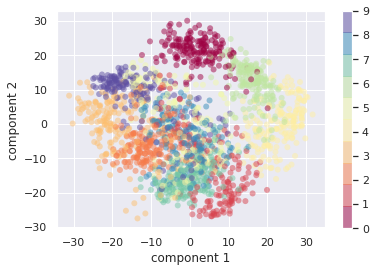

In [29]:
# We can now plot the first two principal components of each point to learn about the data
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

### 1.4.3.3 Total Variance <br>

Given the columns of the $p \times N$ data matrix and assume it is already in mean-deviation from
$$
X=\left[\mathbf{X}_{1}, \mathbf{X}_{2}, \cdots \mathbf{X}_{N}\right]
$$
and let covariance matrix $S$

$$
S=\frac{1}{N-1} X X^{T}
$$
The entries in $S=\left[S_{i j}\right]$, For $j=1, \ldots, p$, the diagonal entry $s_{j j}$ in $\mathrm{S}$ is called the variance of $x_{j}$, which is the first $j-$ th row of $X$. The variance of $x_{j}$ measures the spread of the values of $x_{j}$. The total variance of the data is the sum of the variances on the diagonal of $\mathrm{S}$. In general, the sum of the diagonal entries of a square matrix $\mathrm{S}$ is called the trace of the matrix, written $t r(S)$. Thus
Total Variance $=\operatorname{tr}(S)$
Note that if
$$
X X^{T}=V \operatorname{diag}\left(\lambda_{1}, \ldots, \lambda_{p}\right) V^{T}, \text { or } V^{T} X X^{T} V=\operatorname{diag}\left(\lambda_{1}, \ldots, \lambda_{p}\right)
$$
then
$$
\operatorname{tr}(S)=\frac{1}{N-1} \sum_{1}^{p} \lambda_{j}
$$
because $\operatorname{tr}\left(V S V^{T}\right)=\operatorname{tr}(S)$. Thus the fraction of the variances of the first $k$ term truncation is
$$
\frac{\sum_{1}^{k} \lambda_{j}}{\sum_{1}^{p} \lambda_{j}}
$$